<img src='../img/EU-Copernicus-EUM_banner_logo.png' align='right' width='50%'></img>

<a href="../Index.ipynb"><< Index</a>
<br>
<a href="./1_2_OLCI_file_structure.ipynb"><< OLCI file structure</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./1_4_OLCI_plot_spatial_RGB.ipynb">OLCI spatial plotting (RGB) >></a>

Copernicus Marine Training Service <br>
**Copyright:** 2022 EUMETSAT <br>
**License:** MIT

<div class="alert alert-block alert-info">
<h1>Learn OLCI: Introductory</h1></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
The following modules are prerequisites for this notebook:
- **1_1_OLCI_data_access.iynb** (this will download the required OLCI products for this notebook)

It is recommended to go through these modules before you start with this module.
</div>

<hr>

## OLCI product coverage 

### Learning outcomes

### Outline

<hr>

In [34]:
# library imports
import os
import glob
import xml.etree.ElementTree as ET
from shapely.geometry import Polygon
import numpy as np
import matplotlib.pyplot as plt
import cartopy

In [2]:
# selecting SAFE directories
SAFE_directories = [
    os.path.join(os.getcwd(), 'products', 'S3A_OL_2_WFR____20210717T101015_20210717T101315_20210718T221347_0179_074_122_1980_MAR_O_NT_003.SEN3'),
    os.path.join(os.getcwd(), 'products', 'S3A_OL_2_WRR____20210717T095732_20210717T104152_20210718T152419_2660_074_122______MAR_O_NT_003.SEN3')
    ]

In [3]:
# selecting SAFE manifest
SAFE_manifests = []
for SAFE_directory in SAFE_directories:
    SAFE_manifests.append(glob.glob(os.path.join(SAFE_directory, 'xfd*.xml'))[0])

In [4]:
polygons = []
tags = []
for SAFE_manifest in SAFE_manifests:
    tags.append(SAFE_manifest.split('/')[-2])
    tree = ET.parse(SAFE_manifest)
    root = tree.getroot()
    polygon =  root.findall('.//gml:posList', {'gml':"http://www.opengis.net/gml"})
    polygons.append((polygon[0].text))

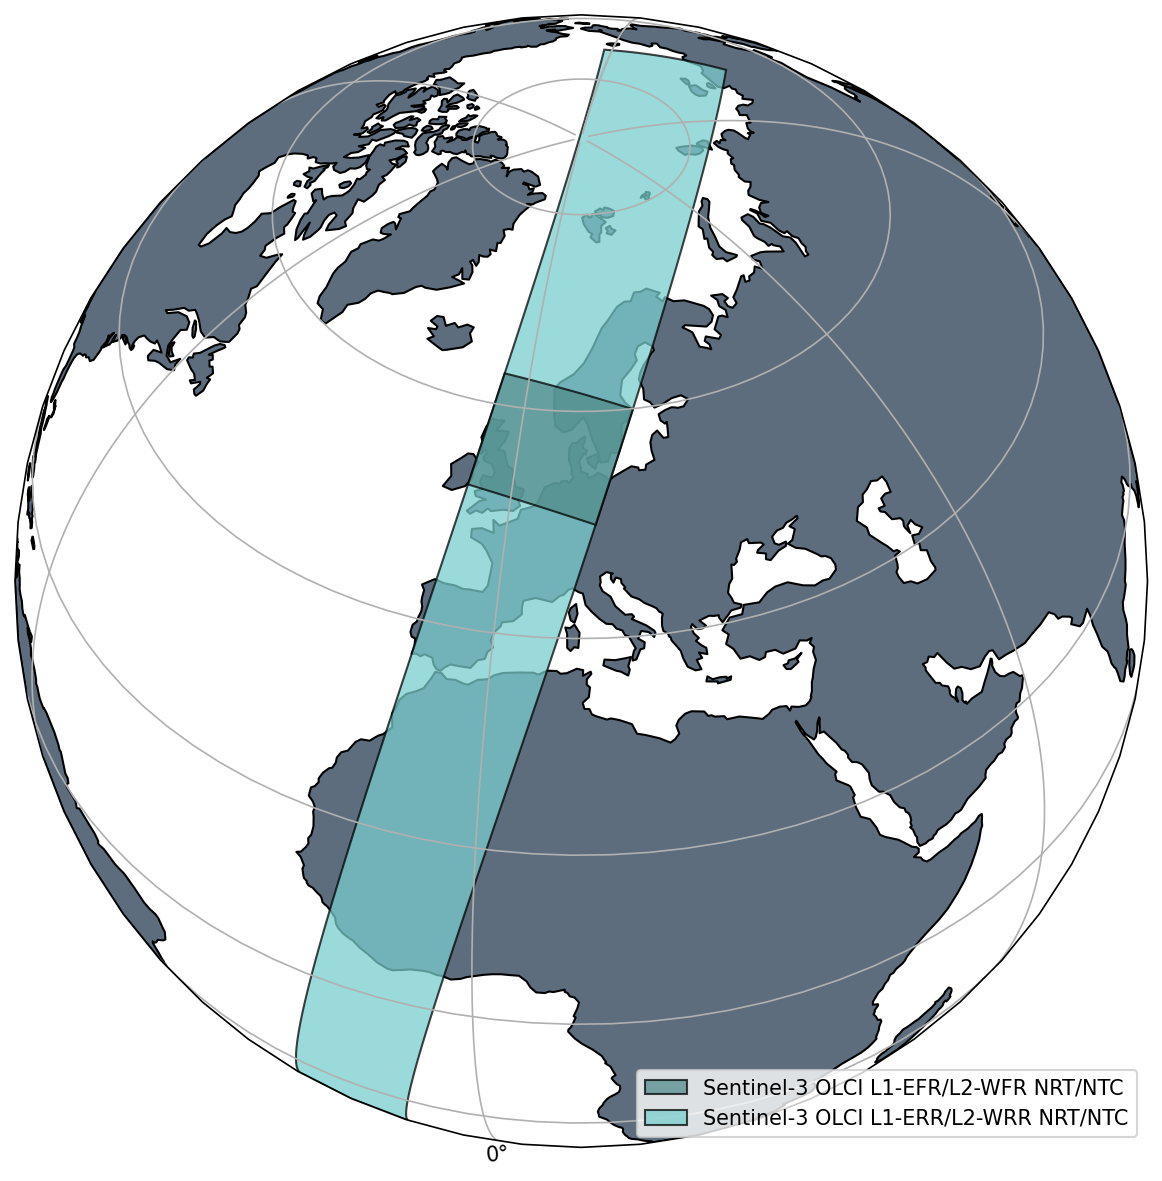

In [35]:
fig1 = plt.figure(figsize=(10, 10), dpi=150)

m = plt.axes(projection=cartopy.crs.NearsidePerspective(central_longitude=10.0, central_latitude=45.0))
m.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='k', facecolor='#5D6D7E')
m.set_global()

gl = m.gridlines(draw_labels = True)

colours = ['#528B8B', '#79CDCD']
zorders = [2, 1]
labels = ['Sentinel-3 OLCI L1-EFR/L2-WFR NRT/NTC', 'Sentinel-3 OLCI L1-ERR/L2-WRR NRT/NTC']

plots = []
for polygon, tag, colour, zorder, SAFE_manifest in zip(polygons, tags, colours, zorders, SAFE_manifests):
    coords = np.asarray(polygon.split(' ')).astype('float')
    polygon_geom = Polygon(zip((coords[1::2]), coords[0::2]))
    x, y = polygon_geom.exterior.xy
    p, = plt.fill(x, y, alpha=0.74, fc=colour, ec='k', transform=cartopy.crs.Geodetic(), zorder=zorder)
    plots.append(p)

plt.legend(plots, labels, loc='lower right')
plt.savefig('OLCI_PDU_coverage.png', bbox_inches='tight')

<hr>

<a href="https://gitlab.eumetsat.int/eumetlab/ocean">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int>Contact helpdesk for support </a> | <a href=mailto:Copernicus.training@eumetsat.int>Contact our training team to collaborate on and reuse this material</a></span></p>